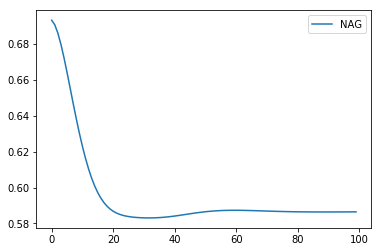

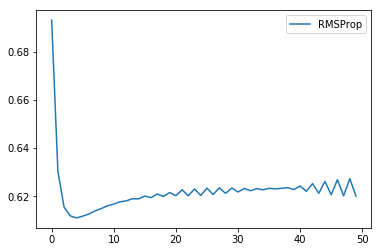

In [5]:
from sklearn.datasets import load_svmlight_file
import numpy as np
import math
import matplotlib.pylab as plt

data_train = load_svmlight_file('./a9a')
data_test = load_svmlight_file('./a9a.t')


init_w = np.zeros(shape=[124,1])
data_train_x = data_train[0].todense()
data_test_x = data_test[0].todense()

data_test_x = np.hstack((data_test_x,np.zeros(shape=[16281,1])))
data_train_x = np.hstack((data_train_x,np.ones(shape=[32561,1])))
data_test_x = np.hstack((data_test_x,np.ones(shape=[16281,1])))#将b放进w里，x相应增加一列全为1

#正则化系数
lamda = 0.7
#动量系数
gama = 0.9

index = data_train_x.shape[0]
#取样
def samples(X,Y,n):
    samples_index = np.random.randint(0,index, n)
    X_samples = np.ones((0, 124))
    y_samples = np.ones((0, 1))

    for i in samples_index:
        X_samples = np.r_[X_samples, X[i].reshape(1, X.shape[1])]
        y_samples = np.r_[y_samples, Y[i].reshape(1,1)]

    return X_samples, y_samples


NAG_loss_list = []
#NAG start
def NAG(X,Y,iter_num):
    w=init_w
    v = np.zeros(shape=[124, 1])
    w_ = w - gama * v
    learning_rate = 0.009
    # 动量
    for i in range(iter_num):
        l = 0
        g_ = 0
        for j in range(data_test_x.shape[0]):
            l += math.log(1 + math.exp(-data_test[1][j] * np.dot(w.T, data_test_x[j].T).tolist()[0][0]))
        for k in range(X.shape[0]):
            g_ += Y[k]/(1+math.exp(Y[k]*np.dot(w_.T,X[k].T).tolist()[0][0]))*X[k]
        loss = l/data_test_x.shape[0] + lamda/2 * np.dot(w.T,w).tolist()[0][0]
        gradient = lamda*w_ - g_.T/iter_num
        v = gama*v + learning_rate*gradient
        w = w - v
        w_ = w - gama*v
        NAG_loss_list.append(loss)

    
    plt.plot(np.arange(0, iter_num), NAG_loss_list, label=u'NAG')
    plt.legend()
    plt.show()
NAG(samples(data_train_x,data_train[1],50)[0],samples(data_train_x,data_train[1],50)[1],100)

RMSProp_loss_list = []
def RMSProp(X,Y,iter_num):
    EPSILON = 1e-8
    # 学习率
    learning_rate = 0.008
    G = np.zeros(shape=[124, 1])
    w = init_w
    for i in range(iter_num):
        l = 0
        g_ = 0
        for j in range(data_test_x.shape[0]):
            l += np.log(1 + np.exp(-data_test[1][j] * np.dot(w.T, data_test_x[j].T).tolist()[0][0]))
        for k in range(X.shape[0]):
            g_ += Y[k] / (1 + math.exp(Y[k] * np.dot(w.T, X[k].T).tolist()[0][0])) * X[k]
        loss = l / data_test_x.shape[0] + lamda / 2 * np.dot(w.T, w).tolist()[0][0]
        gradient = lamda * w - g_.T / iter_num
        G = gama*G + (1 - gama)* np.array(gradient) * np.array(gradient)
        w = w - np.multiply((learning_rate/np.sqrt(G + EPSILON)) , gradient)
        RMSProp_loss_list.append(loss)
    
    plt.plot(np.arange(0, iter_num), RMSProp_loss_list, label=u'RMSProp')
    plt.legend()
    plt.show()

RMSProp(samples(data_train_x,data_train[1],50)[0],samples(data_train_x,data_train[1],50)[1],50)